# Constructing Atom Grids

Atom grids are useful for integrating over atomic domains, such as in the case of atomic orbitals. Atom grids are composed of a radial grid $\{(r_i, w_i)\}_{i=1}^{N}$ meant to integrate the radius coordinate in spherical coordinates. Further, each radial point is associated with an Angular (Lebedev or Symmetric spherical t-design) grid $\{(\theta^i_j, \phi^i_j, w_j^i)\}_{j=1}^{M_i}$ that integrates over a sphere (angles in spherical coordinates).  The atomic grid points can also be centered at a given location.

Grid supports several ways to construct an [AtomGrid](../pyapi/grid.atomgrid.rst#grid.atomgrid.AtomGrid) giving the user a high degree of flexibility. The following example shows different ways to construct an [AtomGrid](../pyapi/grid.atomgrid.rst#grid.atomgrid.AtomGrid) object.

In [7]:
from grid import UniformInteger, LinearInfiniteRTransform, AtomGrid
import numpy as np

# Create a radial grid with 100 points from 1e-4 to 3.0
num_radial_points = 10
oned = UniformInteger(npoints=num_radial_points)
radial_grid = LinearInfiniteRTransform(1e-4, 3.0).transform_1d_grid(oned)

**1. Using a radial grid and an array of angular grid degrees (or sizes) used for constructing angular grids at each radial grid point.**



- Specified AtomGrid (A) with 10 radial points and an angular grid with [11] degrees (Levedev-Laikov) has 500 points.
- Specified AtomGrid (B) with 10 radial points and an angular grid with [11] degrees (symmetric spherical t-design) has 700 points.
- Specified AtomGrid (B) with 10 radial points and an angular grid with size [60] has 740 points.


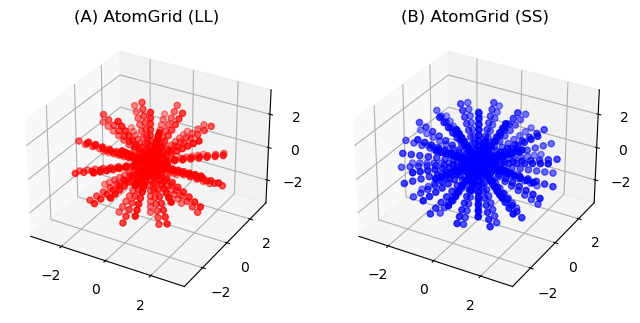

In [8]:
import matplotlib.pyplot as plt

# (A) AtomGrid  from a radial grid and an angular degree 
angular_degrees = [11]
atomgrid_deg_ll = AtomGrid(radial_grid, degrees=angular_degrees)
print(f"\n- Specified AtomGrid (A) with {num_radial_points} radial points and an angular grid with "
      f"{angular_degrees} degrees (Levedev-Laikov) has {atomgrid_deg_ll.size} points.")

# (B) symmetric spherical t-design  can also be specified
atomgrid_deg_ss = AtomGrid(radial_grid, degrees=angular_degrees, use_spherical=True)
print(f"- Specified AtomGrid (B) with {num_radial_points} radial points and an angular grid with "
      f"{angular_degrees} degrees (symmetric spherical t-design) has {atomgrid_deg_ss.size} points.")

# (C) Angular grids can also be specified by a angular size
angular_sizes = [60]
atomgrid_sizes = AtomGrid(radial_grid, sizes=angular_sizes)
print(f"- Specified AtomGrid (B) with {num_radial_points} radial points and an angular grid with "
      f"size {angular_sizes} has {atomgrid_sizes.size} points.")

# get the grid points
x1, y1, z1 = atomgrid_deg_ll.points.T
x2, y2, z2 = atomgrid_deg_ss.points.T

# plot the three grids
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x1, y1, z1, c='r', marker='o')
ax1.set_title(f"(A) AtomGrid (LL)")

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x2, y2, z2, c='b', marker='o')
ax2.set_title(f"(B) AtomGrid (SS)")

plt.show()


This way of constructing [AtomGrid](../pyapi/grid.atomgrid.rst#grid.atomgrid.AtomGrid) objects offers several ways to specify different angular grids for each radial grid point.
- By rotating the angular grid (Lebedev or Symmetric spherical t-design) corresponding to each radial grid point by a random angle. 
- By specifying a different angular grid degree (or size) for each radial grid point.

- Specified AtomGrid with 10 radial points and a (rotated) angular grid with [11] degrees has 500 points.
- Specified AtomGrid with 10 radial points and individual angular grids has 1928 points.


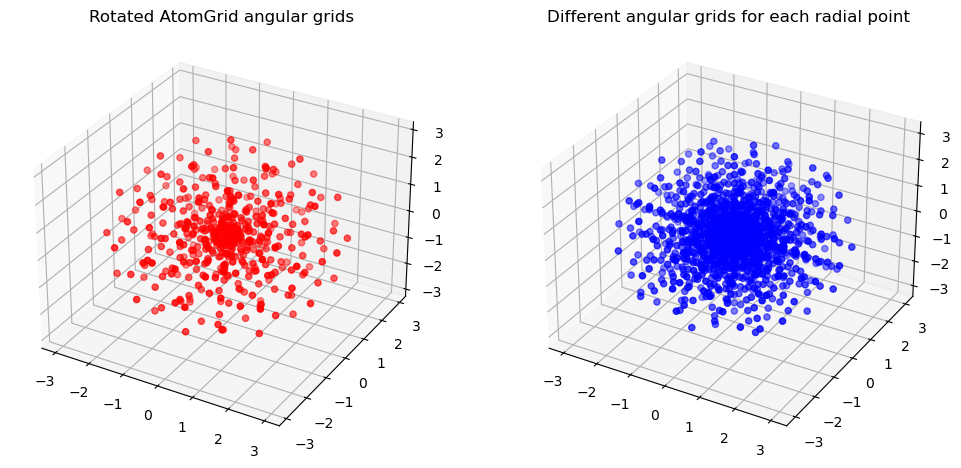

In [9]:
# Rotated angular grids can be specified by the rotate keyword
atomgrid_deg_rot = AtomGrid(radial_grid, degrees=angular_degrees, rotate=True)
print(f"- Specified AtomGrid with {num_radial_points} radial points and a (rotated) angular grid"
      f" with {angular_degrees} degrees has {atomgrid_deg_rot.size} points.", end="\n")

# Angular grids can have different degrees for each radial point 
angular_degrees = [30 - 2 * i for i in range(num_radial_points)]
atomgrid_pruned = AtomGrid(radial_grid, degrees=angular_degrees)
print(f"- Specified AtomGrid with {num_radial_points} radial points and individual angular grids"
      f" has {atomgrid_pruned.size} points.", end="\n")

# get the grid points
x1, y1, z1 = atomgrid_deg_rot.points.T
x2, y2, z2 = atomgrid_pruned.points.T

# plot the two grids
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, y1, z1, c='r', marker='o')
ax1.set_title(f"Rotated AtomGrid angular grids")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x2, y2, z2, c='b', marker='o')
ax2.set_title(f"Different angular grids for each radial point")

plt.show()


**2. From a radial grid, an atom radius, a set of radial sectors and the degrees (or sizes) of angular grids for each of the sectors.**

Specified AtomGrid from pruned radial grid with 10 radial points, atomic radii 2.418849439520986, radial sectors [0.5, 1.0, 1.5] and angular degrees [3, 4, 5, 7] has 132 points.


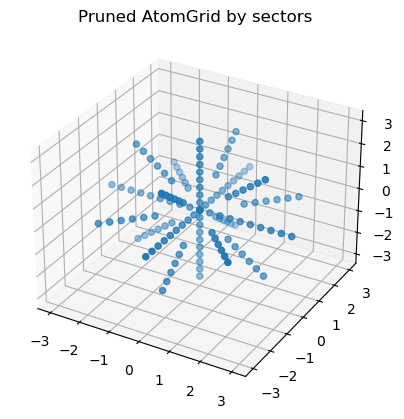

In [10]:

# Create an atom grid, from a radial grid, an atomic radii, a list of radial sectors and a list of
# angular degrees, one for each radial sector
atom_radius = 2.418849439520986 
# radial sector 1 will be from 0 to 0.5 atom_radius, sector 2 from 0.5 atom_radius to atom_radius 
# and so on.
sectors_r = [0.5, 1., 1.5]
# degrees for each sector
sectors_degree = [3, 4, 5, 7]
atomgrid = AtomGrid.from_pruned(radial_grid, atom_radius, sectors_r=sectors_r, sectors_degree=sectors_degree)
print(f"Specified AtomGrid from pruned radial grid with {num_radial_points} radial points, atomic radii"
        f" {atom_radius}, radial sectors {sectors_r} and angular degrees {sectors_degree} has "
        f"{atomgrid.size} points.")

# get the grid points
x, y, z = atomgrid.points.T

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)
ax.set_title(f"Pruned AtomGrid by sectors")
plt.show()



**3. From radial grid and a preset angular grid name.**
[AtomGrid](../pyapi/grid.atomgrid.rst#grid.atomgrid.AtomGrid) supports `coarse`, `medium`, `fine`, `veryfine`, `ultrafine`, and `insane` preset angular grids in increasing order of angular grid size. 

Specified AtomGrid from preset radial grid with 10 radial points, atomic number 3 and preset 'coarse' has 728 points.
Specified AtomGrid from preset radial grid with 10 radial points, atomic number 3 and preset 'medium' has 1240 points.
Specified AtomGrid from preset radial grid with 10 radial points, atomic number 3 and preset 'fine' has 1888 points.


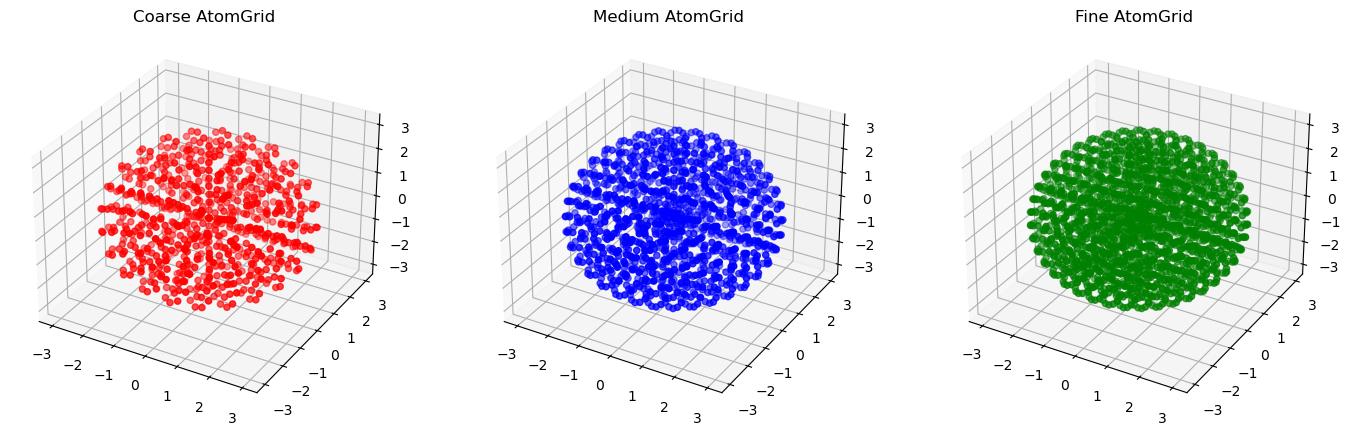

In [11]:
# Construct coarse, medium and fine atom grids from a radial grid
atomgrid_coarse = AtomGrid.from_preset(radial_grid, atnum=3, preset="coarse")
print(f"Specified AtomGrid from preset radial grid with {num_radial_points} radial points, atomic number"
        f" 3 and preset 'coarse' has {atomgrid_coarse.size} points.")

atomgrid_medium = AtomGrid.from_preset(radial_grid, atnum=3, preset="medium")
print(f"Specified AtomGrid from preset radial grid with {num_radial_points} radial points, atomic number"
        f" 3 and preset 'medium' has {atomgrid_medium.size} points.")

atomgrid_fine = AtomGrid.from_preset(radial_grid, atnum=3, preset="fine")
print(f"Specified AtomGrid from preset radial grid with {num_radial_points} radial points, atomic number"
        f" 3 and preset 'fine' has {atomgrid_fine.size} points.")

# get the grid points
x1, y1, z1 = atomgrid_coarse.points.T
x2, y2, z2 = atomgrid_medium.points.T
x3, y3, z3 = atomgrid_fine.points.T

# plot the three grids
fig = plt.figure(figsize=(17, 6))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(x1, y1, z1, c='r', marker='o')
ax1.set_title(f"Coarse AtomGrid")

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(x2, y2, z2, c='b', marker='o')
ax2.set_title(f"Medium AtomGrid")

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(x3, y3, z3, c='g', marker='o')
ax3.set_title(f"Fine AtomGrid")

plt.show()

Another feature of [AtomGrid](../pyapi/grid.atomgrid.rst#grid.atomgrid.AtomGrid) is that it supports the `center` argument to specify the center of the grid. If not specified, the grid is centered at the origin.

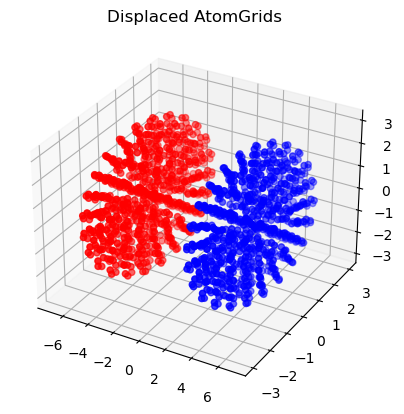

In [12]:
# change the center of the atom grid
center = np.array([4.0, 0.0, 0.0])

atomgrid_disp_1= AtomGrid.from_preset(radial_grid, atnum=3, preset="coarse", center=-center)
atomgrid_disp_2= AtomGrid.from_preset(radial_grid, atnum=3, preset="coarse", center=center)

# get the grid points
x1, y1, z1 = atomgrid_disp_1.points.T
x2, y2, z2 = atomgrid_disp_2.points.T

# plot the two grids in the same figure
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, y1, z1, c='r', marker='o')
ax.scatter(x2, y2, z2, c='b', marker='o')
ax.set_title(f"Displaced AtomGrids")
plt.show()